In [19]:

#importing libraries
import pandas as pd
import time
from sklearn.model_selection import train_test_split # For splitting the data
from sklearn.preprocessing import StandardScaler # For normalizing the data
from sklearn.metrics import confusion_matrix # For creating the confurion matrix


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

 For the performance of an algorithm, we need Big O notation or big omega notation. 
 Time is not an indicator for performance of an algorithm. However in this experiment
 we used time as an indicator that shows the performance. That is why it will be hard to calculate each 
 algortihm's performance with Big O notation or big omega notation

In [20]:
# This function gives us the time value in miliseconds.
def current_milli_time():
    return round(time.time() * 1000)

In [21]:
# This function calculates the accuracy rate of a confusion matrix.
def calculate_AR(confusion_matrix):
    return (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1])


In [22]:
def print_values(algorithm:str, accuracy_rate:float, training_time:int):
    print(algorithm, "Accuracy rate", round(accuracy_rate*100,2), "Training time:", training_time)


In [23]:
#obtaining the data which have data of all the attacks
data = pd.read_csv("Results/All_Attacks.csv",sep=";")

In [24]:
#filing the missing values with backward filling
data.fillna(method = 'bfill', inplace=True)   


In [25]:
#dropping the duplicates
data = data.drop_duplicates(inplace=False)


In [26]:
data.head()

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
0,61.0,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1
1,61.0,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,1
2,62.0,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,1
3,62.0,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,1
4,63.0,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,1


In [27]:
data.shape

(10845, 17)

[0.11543006 0.11156407 0.15103888 0.01824328 0.07019545 0.06624548
 0.07890113 0.09980203 0.05950015 0.03813002 0.08804585 0.0828341
 0.00576058 0.00238411 0.0119248 ]


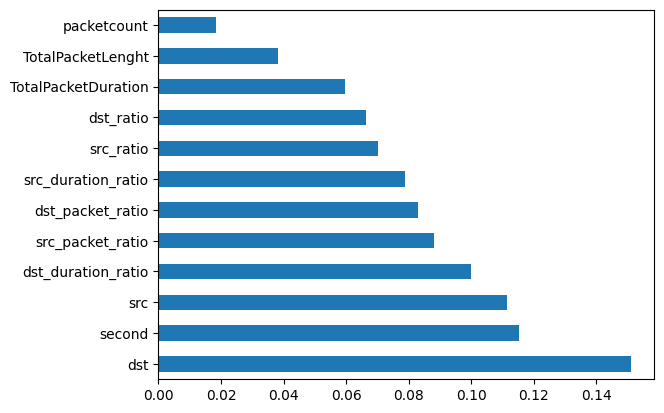

In [28]:
#finding the feature importance ranking of the features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = data.iloc[:,0:15]  #independent columns
#normalizing the data
y = data.iloc[:,-1]    #target column i.e label
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')   
plt.show()



In [29]:
#splitting the data into dependent (lbl) and independent variables

#copy the data into a new variable
data_copy = data.copy()

#drop the label column from the data
data_copy.drop(['label'], axis=1, inplace=True)

#y is the label column
y = data['label']

#x is the data without the label column
X = data_copy





In [30]:
# The dataset was split into test and training datasets in the amount of 2/3. (2/3 training, 1/3 testing).
# donot shuffle the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15, shuffle=True)

**Scripts for Decision Tree Classifier**

In [31]:
dtstart_time = current_milli_time() # Obtaining initial time of the training
dtc=DecisionTreeClassifier(criterion='entropy') # Creating the Decision Tree Classifier object
dtc.fit(x_train,y_train) # Training the data
dtend_time = current_milli_time() # Obtaining ending time of the training
DTduration = dtend_time - dtstart_time # Calculating the duration
y_pred_dtc = dtc.predict(x_test) # Predicting data
cm_dtc = confusion_matrix(y_test,y_pred_dtc) # Creating confusion matrix
ar_dtc = calculate_AR(cm_dtc) # Calculating accuracy rate.

**Scripts for Naive Bayes Classifier**

In [32]:
nbstart_time = current_milli_time() # Obtaining initial time of the training
gnb = GaussianNB() # Creating the Naive Bayes Classifier object
gnb.fit(x_train,y_train) # Training the data
nbend_time = current_milli_time() # Obtaining ending time of the training
NBduration = nbend_time - nbstart_time # Calculating the duration
y_pred_nb = gnb.predict(x_test) # Predicting data
cm_nb = confusion_matrix(y_test,y_pred_nb) # Creating confusion matrix
ar_nb = calculate_AR(cm_nb) # Calculating accuracy rate.

**Scripts for KNN Classifier**

In [33]:

knnstart_time = current_milli_time() # Obtaining initial time of the training
knn = KNeighborsClassifier() # Creating the KNN Classifier object
knn.fit(x_train,y_train) # Training the data
knnend_time = current_milli_time() # Obtaining ending time of the training
knnduration=knnend_time - knnstart_time # Calculating the duration
y_pred_knn = knn.predict(x_test) # Predicting data
cm_knn = confusion_matrix(y_test,y_pred_knn) # Creating confusion matrix
ar_knn = calculate_AR(cm_knn) # Calculating accuracy rate.

**Scripts for Random Forest Classifation**

In [34]:
rfstart_time = current_milli_time() # Obtaining initial time of the training
rfc = RandomForestClassifier(n_estimators=860, criterion='entropy') # Creating the Random Forest Classifation object
rfc.fit(x_train,y_train) # Training the data
rfend_time = current_milli_time() # Obtaining ending time of the training
RFduration = rfend_time - rfstart_time # Calculating the duration
y_pred_rfc = rfc.predict(x_test) # Predicting data
cm_rfc = confusion_matrix(y_test,y_pred_rfc) # Creating confusion matrix
ar_rfc = calculate_AR(cm_rfc) # Calculating accuracy rate.


In [35]:
# Printing the results
print("Results:")
print_values("Random Forest Classifation", ar_rfc, RFduration)
print_values("Decision Tree Classifier", ar_dtc, DTduration)
print_values("Naive Bayes Classifier", ar_nb, NBduration)
print_values("KNN Classifier", ar_knn, knnduration)



Results:
Random Forest Classifation Accuracy rate 91.59 Training time: 25567
Decision Tree Classifier Accuracy rate 85.92 Training time: 192
Naive Bayes Classifier Accuracy rate 61.4 Training time: 11
KNN Classifier Accuracy rate 64.93 Training time: 8
